<a href="https://colab.research.google.com/github/Shiwei-Chen/Models/blob/master/Association.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [24]:
url = 'https://raw.githubusercontent.com/Shiwei-Chen/DESC-624/master/restaurant.csv'

df = pd.read_csv(url)
df

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


In [25]:
df.dtypes

userID            object
placeID            int64
rating             int64
food_rating        int64
service_rating     int64
dtype: object

**Apriori Algorithm**

In [40]:
basket = (df.groupby(['userID', 'placeID'])['rating']
          .sum().unstack().reset_index().fillna(0)
          .set_index('userID'))

basket.head()

placeID,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,132626,132630,132654,132660,132663,132665,132667,132668,132706,132715,132717,132723,132732,132733,132740,132754,132755,132766,132767,132768,132773,132825,132830,132834,132845,132846,132847,132851,132854,132856,...,135044,135045,135046,135047,135048,135049,135050,135051,135052,135053,135054,135055,135057,135058,135059,135060,135062,135063,135064,135065,135066,135069,135070,135071,135072,135073,135074,135075,135076,135079,135080,135081,135082,135085,135086,135088,135104,135106,135108,135109
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
U1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
U1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
U1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
#making data ready for apriori algorithm
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    else: 
        return 0    

basket_sets = basket.applymap(encode_units)

In [45]:
frequent_itemsets = apriori(basket_sets, min_support=0.06, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values('lift', inplace=True, ascending=False)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21,(135062),(135052),0.115942,0.130435,0.065217,0.562500,4.312500,0.050095,1.987578
20,(135052),(135062),0.130435,0.115942,0.065217,0.500000,4.312500,0.050095,1.768116
15,(135062),(135032),0.115942,0.152174,0.065217,0.562500,3.696429,0.047574,1.937888
14,(135032),(135062),0.152174,0.115942,0.065217,0.428571,3.696429,0.047574,1.547101
16,(135060),(135038),0.130435,0.137681,0.065217,0.500000,3.631579,0.047259,1.724638


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81537e6d68>]],
      dtype=object)

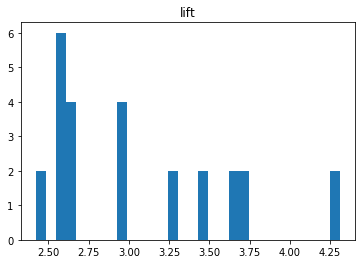

In [46]:
rules.hist('lift', bins = 30, grid = False)